In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier



In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [17]:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [396]:
df = pd.read_csv("C:/Users/bhara/Downloads/churn.csv",index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [400]:
df.drop("Surname",axis=1,inplace=True)

In [402]:
df.describe([0.05,0.2,0.25,0.5,0.75])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
20%,1.561638e+07,566.000000,31.000000,2.000000,0.000000,1.000000,0.00000,0.000000,41050.736000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [404]:
cat_cols = [cols for cols in df.columns if df[cols].dtype == "O" or df[cols].nunique()<12 ]

In [406]:
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [408]:
cat_cols.pop()

'Exited'

In [410]:
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [412]:
num_cols = [cols for cols in df.columns if df[cols].dtype != "O" and df[cols].nunique()>11]


In [414]:
for items in num_cols:
    if items in cat_cols:
        num_cols.remove(items)

In [416]:
num_cols

['CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [418]:
num_cols.pop(0)

'CustomerId'

In [420]:
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [422]:
churn = df[df['Exited']==1]
not_churn = df[df['Exited']==0]

In [424]:
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [426]:
print(churn['Geography'].value_counts())
not_churn['Geography'].value_counts()

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64


Geography
France     4204
Spain      2064
Germany    1695
Name: count, dtype: int64

In [428]:
print(churn['Gender'].value_counts())
not_churn['Gender'].value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64


Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [430]:
print(churn['Tenure'].value_counts().sort_values())
not_churn['Tenure'].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64


Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

In [432]:
print(churn['NumOfProducts'].value_counts().sort_values())
not_churn['NumOfProducts'].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64


NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [434]:
print(churn['HasCrCard'].value_counts().sort_values())
not_churn['HasCrCard'].value_counts().sort_values()

HasCrCard
0     613
1    1424
Name: count, dtype: int64


HasCrCard
0    2332
1    5631
Name: count, dtype: int64

## Num Variables

In [437]:
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

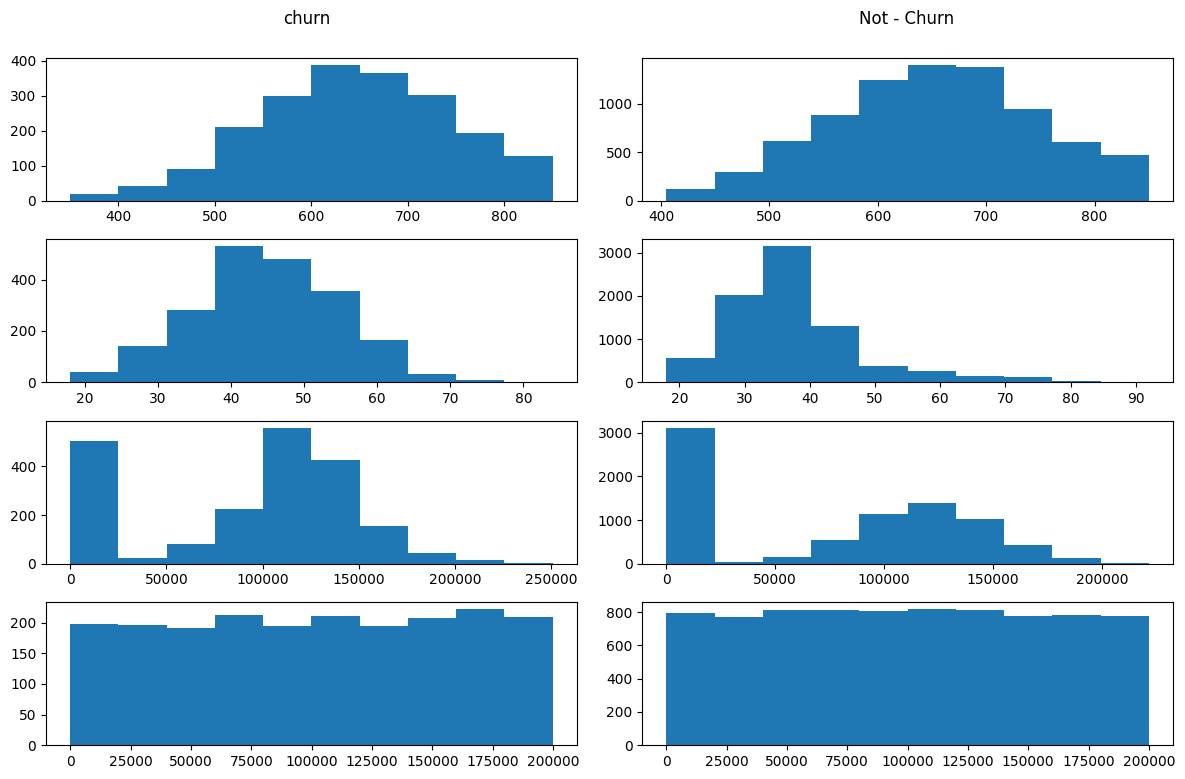

In [439]:
fig,axs = plt.subplots(4,2,figsize=(12,8))
axs[0,0].hist(churn["CreditScore"])
axs[0,1].hist(not_churn["CreditScore"])
axs[1,0].hist(churn["Age"])
axs[1,1].hist(not_churn["Age"])
axs[2,0].hist(churn["Balance"])
axs[2,1].hist(not_churn["Balance"])
axs[3,0].hist(churn["EstimatedSalary"])
axs[3,1].hist(not_churn["EstimatedSalary"])
fig.text(0.26, 0.95, 'churn', ha='center', fontsize=12)
fig.text(0.76, 0.95, 'Not - Churn', ha='center', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

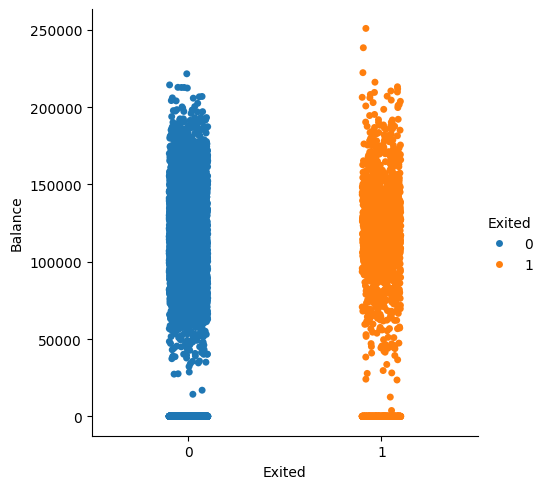

In [440]:
sns.catplot(data=df,x="Exited",y="Balance",hue='Exited')

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


In [445]:
numdf = df.select_dtypes(include=['int64', 'float64'])

<Axes: >

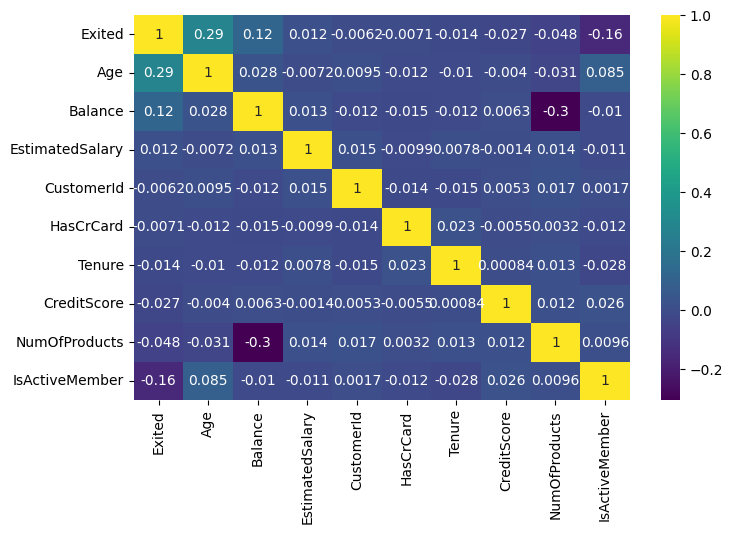

In [447]:
corr_cols = numdf.corr().nlargest(10,'Exited')['Exited'].index
cm=numdf[corr_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [449]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

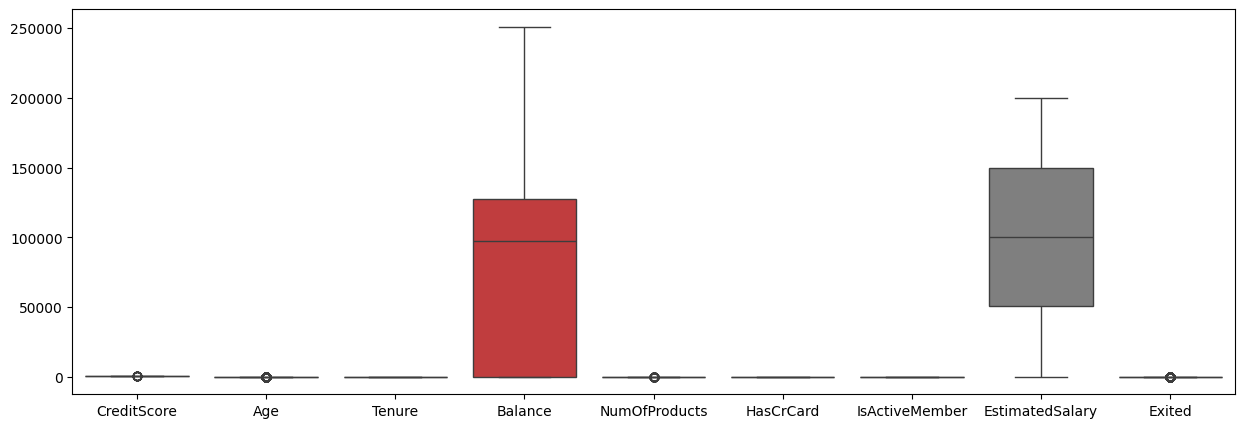

In [451]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df.drop(columns="CustomerId"))

In [453]:
def outlier(df,col,upp,low):
    q1 = df[col].quantile(low)
    q3 = df[col].quantile(upp)
    iqr = q3 - q1
    upplim = q3 + (1.5*iqr)
    lowlim = q1 - (1.5*iqr)
    return lowlim, upplim

for col in numdf.columns:
    lowlim,upplim=outlier(df,col,0.95,0.05)
    if df[(df[col]>upplim)|(df[col]<lowlim)].any(axis=None):
        print(col,"has outliers")


NumOfProducts has outliers


In [455]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [458]:
df["NewTenure"] = df["Tenure"]/df["Age"]
df["N_CreditScore"]=pd.qcut(df["CreditScore"],q=4,labels=[1,2,3,4])
df["N_Age"]=pd.qcut(df["Age"],q=4,labels=[1,2,3,4])
df["N_Balance"]=pd.qcut(df["Balance"].rank(method="first"),q=5,labels=[1,2,3,4,5])
df["N_EstimatedSalary"]=pd.qcut(df["EstimatedSalary"],q=10,labels=[1,2,3,4,5,6,7,8,9,10])

In [460]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,N_CreditScore,N_Age,N_Balance,N_EstimatedSalary
RowNumber,,,,,,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,2,3,1,6
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,3,3,6
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,3,5,6
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,3,3,1,5
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,4,3,4,4


In [462]:
df=pd.get_dummies(df,columns=["Gender","Geography"],drop_first=True)

In [464]:
df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,N_CreditScore,N_Age,N_Balance,N_EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0.047619,2,3,1,6,False,False,False
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,3,3,6,False,False,True
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,3,5,6,False,False,False
4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0.025641,3,3,1,5,False,False,False
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,4,3,4,4,False,False,True


In [466]:
df.drop(["CustomerId"],axis=1,inplace=True)

In [468]:
from sklearn.preprocessing import RobustScaler
robscal = RobustScaler()

In [470]:
numdf.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Age                10000 non-null  int64   
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   NewTenure          10000 non-null  float64 
 10  N_CreditScore      10000 non-null  category
 11  N_Age              10000 non-null  category
 12  N_Balance          10000 non-null  category
 13  N_EstimatedSalary  10000 non-null  category
 14  Gender_Male        10000 non-null  bool    
 15  Geography_Germany  10000 non-null  bool    
 16  Geography

In [474]:
numdfcols = [cols for cols in df.columns if df[cols].dtype != "O" and len(df[cols].value_counts()) <= 10]
(numdfcols)

['NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'N_CreditScore',
 'N_Age',
 'N_Balance',
 'N_EstimatedSalary',
 'Gender_Male',
 'Geography_Germany',
 'Geography_Spain']

In [480]:
cols_need_scale = [cols for cols in df.columns if cols not in numdfcols]
cols_need_scale

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NewTenure']

In [482]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,N_CreditScore,N_Age,N_Balance,N_EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0.047619,2,3,1,6,False,False,False
2,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,3,3,6,False,False,True
3,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,3,5,6,False,False,False
4,699,39,1,0.00,2,0,0,93826.63,0,0.025641,3,3,1,5,False,False,False
5,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,4,3,4,4,False,False,True


In [486]:
scaled_data = robscal.fit_transform(df[cols_need_scale])

In [490]:
df[cols_need_scale] = scaled_data

In [492]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,N_CreditScore,N_Age,N_Balance,N_EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,1,1,1,0.011739,1,-0.600907,2,3,1,6,False,False,False
2,-0.328358,0.333333,-1.00,-0.104906,1,0,1,0.125512,0,-0.772358,2,3,3,6,False,False,True
3,-1.119403,0.416667,0.75,0.489346,3,1,0,0.139630,1,0.453515,1,3,5,6,False,False,False
4,0.350746,0.166667,-1.00,-0.761480,2,0,0,-0.064717,0,-0.763126,3,3,1,5,False,False,False
5,1.477612,0.500000,-0.75,0.221806,1,1,1,-0.214561,0,-0.609081,4,3,4,4,False,False,True


# Modeling and Prediction

In [501]:
X = df.drop("Exited",axis=1)
y=df["Exited"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

models = [("LR",LogisticRegression()),
         ("RFC",RandomForestClassifier()),
         ("KNC",KNeighborsClassifier()),
         ("SVC",SVC()),
        ("GBC",GradientBoostingClassifier()),
        ("DTC",DecisionTreeClassifier()),
        ("RFC",RandomForestClassifier()),
        ("LGBMC",LGBMClassifier())]

results = {}
for name,model in models:
    kfold = KFold(n_splits = 5)
    cvs = cross_val_score(model,X,y,cv=kfold,verbose=2)
    results[name]=(cvs.mean())

results
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] END .................................................... total time=   3.3s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.3s
[CV] END .................................................... total time=   3.3s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   3.4s
[LightGBM] [Info] Number of positive: 1621, number of negative: 6379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202625 -> initscore=-1.369968
[LightGBM] [Info] Start training from score -1.369968


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.8s
[LightGBM] [Info] Number of positive: 1607, number of negative: 6393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200875 -> initscore=-1.380835
[LightGBM] [Info] Start training from score -1.380835


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END .................................................... total time=   0.8s
[LightGBM] [Info] Number of positive: 1634, number of negative: 6366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204250 -> initscore=-1.359940
[LightGBM] [Info] Start training from score -1.359940
[CV] END .................................................... total time=   1.0s
[LightGBM] [Info] Number of positive: 1639, number of negative: 6361
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


{'LR': 0.8222999999999999,
 'RFC': 0.8621000000000001,
 'KNC': 0.8248999999999999,
 'SVC': 0.8291999999999999,
 'GBC': 0.8648,
 'DTC': 0.7876000000000001,
 'LGBMC': 0.8626999999999999}

# Model evaluation done - LGB, RFC and GBC are good

In [516]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred = gbm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1930   73]
 [ 258  239]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.77      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [518]:
rfcm = RandomForestClassifier()
rfcm.fit(X_train,y_train)
y_pred = rfcm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1935   68]
 [ 257  240]]


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.48      0.60       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [519]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[LightGBM] [Info] Number of positive: 1540, number of negative: 5960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205333 -> initscore=-1.353288
[LightGBM] [Info] Start training from score -1.353288
[[1922   81]
 [ 249  248]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2003
           1       0.75      0.50      0.60       497

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [550]:
def generate_roc_auc_curve(clf,X_test):
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
    auc = roc_auc_score(y_test,y_pred_prob)
    print(auc)
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(alpha=0.3)
    plt.show()
    pass

0.8601062189412059


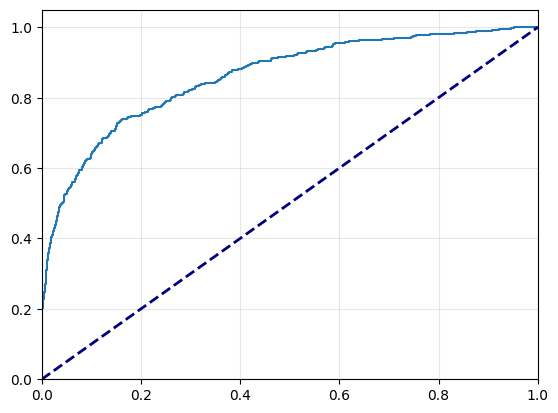

In [552]:
generate_roc_auc_curve(lgbm,X_test)

0.856238780662005


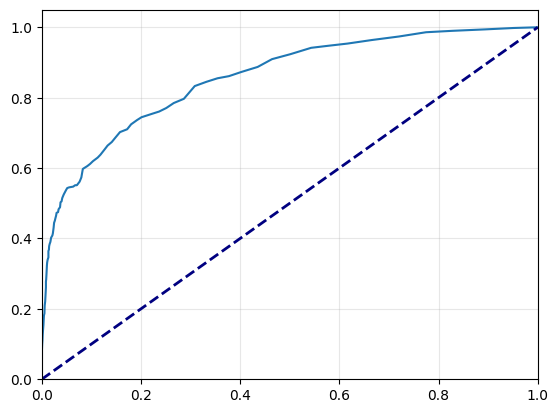

In [554]:
generate_roc_auc_curve(rfcm,X_test)

0.867120345638484


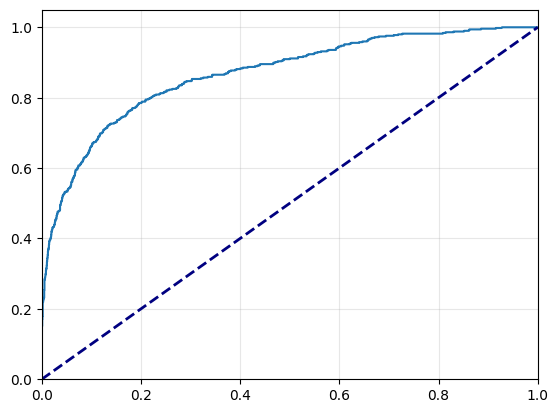

In [556]:
generate_roc_auc_curve(gbm,X_test)